## Preparing the data
Preparing the dataset for further usage.


In [68]:
import cv2 as cv
from matplotlib import pyplot as plt
import pathlib
import numpy as np 

Getting the data.

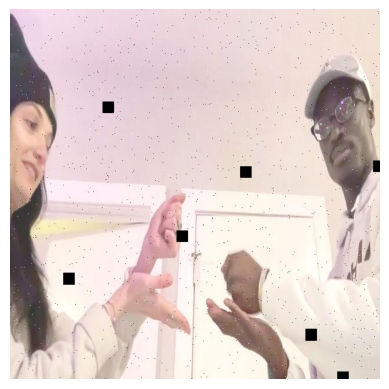

In [69]:
data_dir_path = "C:/Khare/Postman_drive/Dataset_textannot/"
train_dir = pathlib.Path(data_dir_path + "/train_small/").with_suffix('')

image_files = list(train_dir.glob('*.jpg'))

sample_img_path = str(image_files[10])
sample_img = cv.imread(sample_img_path, cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(sample_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



The data consist of images files and respective annotation files. Each annotation file has one or more lines in which we can find the class and bounding box coordinates:


In [70]:
sample_annotation_path = sample_img_path[0:-4] + '.txt'
with open(sample_annotation_path) as f:
    print(f.readlines())

['1 0.6265625 0.7359375 0.1140625 0.18359375\n', '1 0.42421875 0.5921875 0.1015625 0.184375']


In [71]:
import os

def list_files_for_directory(data_path, image_ext='.jpg'):
    files = []
    discarded = 0
    class_counts = [0, 0, 0]  # Counts for each class (0, 1, 2)

    for filename in os.listdir(data_path):
        if filename.endswith('.txt'):
            # Read the annotation file
            annotation_path = os.path.join(data_path, filename)
            with open(annotation_path, 'r') as annotation_file:
                lines = annotation_file.readlines()

                # Check if the annotation file is empty or has invalid content
                if not lines:
                    discarded += 1
                    continue

                # Extract the class label if it's present on the first line
                if lines[0].strip():
                    class_label = int(lines[0].split()[0])
                    class_counts[class_label] += 1

            # Construct the path to the corresponding image file
            base_name = os.path.splitext(filename)[0]
            image_path = os.path.join(data_path, base_name + image_ext)
            if os.path.isfile(image_path):
                files.append(image_path)

    print(f"{discarded} file(s) discarded")
    print(f"Class counts: Class 0 - {class_counts[0]}, Class 1 - {class_counts[1]}, Class 2 - {class_counts[2]}")
    
    return files


The code generates a list of all the images along with the full path, from the directory specified.

In [72]:
train_data_path = 'C:/Khare/Postman_drive/Dataset_textannot/train/'
train_files = list_files_for_directory(train_data_path)

4269 file(s) discarded
Class counts: Class 0 - 2070, Class 1 - 2629, Class 2 - 1985


In [108]:
train_files

['C:/Khare/Postman_drive/Dataset_textannot/train/0001_png.rf.02e05ccaf2bf8a0065be0ad8484f68cb.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0001_png.rf.4504a044b457dd63303eaeefe4673478.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0001_png.rf.5e22fcd367ffc26ff60b1c51ad0f660c.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0001_png.rf.c2b53e01064aabbf825f06dd3a017500.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0001_png.rf.f1358fc7c4dffd593d148b2fa661b757.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0003_png.rf.2343a9aaae8f45b68bcdb31d529c5974.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0003_png.rf.8affb45c720cbb35f4a2130c5b8671b9.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0003_png.rf.9bcfca705d67775d244ac7f85110d31d.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0003_png.rf.b3d0db1b6e9b64d2d8604139ee10306d.jpg',
 'C:/Khare/Postman_drive/Dataset_textannot/train/0003_png.rf.fb0cf5a30debc7f34d0ce91aad1656da.jpg',


Before proceeding we'll format the images to 244x244.

In [74]:
input_size = 244

def format_image(img, box):
    height, width = img.shape 
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv.resize(img, new_size, interpolation= cv.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)]

    return new_image, new_box

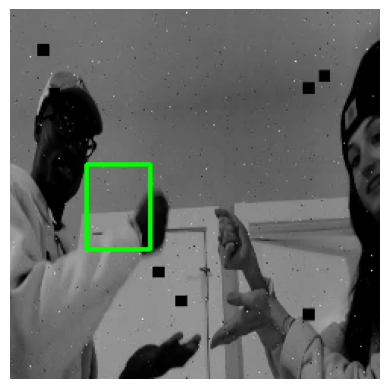

In [76]:
temp_img = cv.imread("C:/Khare/Postman_drive/Dataset_textannot/train_small/0007_png.rf.77b1f4e5243fe708dad565475347ee5f.jpg", cv.IMREAD_GRAYSCALE)
temp_box = [0.29453125, 0.53984375, 0.17734375, 0.2375]

temp_img_formated, box = format_image(temp_img, temp_box)

temp_color_img = cv.cvtColor(temp_img_formated, cv.COLOR_GRAY2RGB)

cv.rectangle(temp_color_img, box, (0, 255, 0), 2)

plt.imshow(temp_color_img)
plt.axis("off")
plt.show()

Alright now let's try and plot an image along with the box aroung the object of interest to verify the annotations.


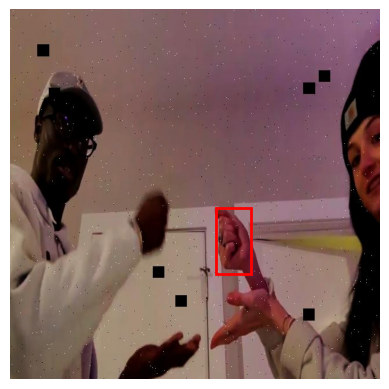

In [77]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sample image path
sample_img_path = "C:/Khare/Postman_drive/Dataset_textannot/train_small/0007_png.rf.77b1f4e5243fe708dad565475347ee5f.jpg"   
# Sample annotation file path
sample_annotation_path = "C:/Khare/Postman_drive/Dataset_textannot/train_small/0007_png.rf.77b1f4e5243fe708dad565475347ee5f.txt"

# Load the sample image
sample_img = cv2.imread(sample_img_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Read the annotation file
with open(sample_annotation_path, "r") as f:
    lines = f.readlines()

# Assuming there's only one annotation in the file
if lines:
    annotation = lines[0].split()
    category_id, x_center, y_center, width, height = map(float, annotation)

    # Get the actual dimensions of the image
    image_height, image_width, _ = sample_img.shape

    # Convert percentages to pixel coordinates
    x1 = int((x_center - width / 2) * image_width)
    y1 = int((y_center - height / 2) * image_height)
    x2 = int((x_center + width / 2) * image_width)
    y2 = int((y_center + height / 2) * image_height)

    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="r", facecolor="none")

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(sample_img)

    # Add the Rectangle patch to the axes
    ax.add_patch(rect)

    # Show the plot
    plt.axis("off")
    plt.show()


Let's create a tensorflow dataset with the images. This is going to ensure that our data works smoothly and efficiently in TensorFlow.


In [78]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # disabling verbose tf logging

# uncomment the following line if you want to force CPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
print(tf.__version__)


2.10.1


In [79]:
input_size = 244

def data_load(files, data_path , image_ext = ".jpg"):
    X = []
    Y = []

    for file in files:
        img = cv.imread(os.path.join(data_path, file ), cv.IMREAD_GRAYSCALE)

        k = 1

        base_filename = os.path.splitext(file)[0]
        annotation_file = os.path.join(data_path, base_filename + ".txt")  
        with open(annotation_file, 'r') as fp:
            line = fp.readlines()[0]
            if line[0] == '0':
                k = 0

            box = np.array(line[1:].split(), dtype=float)

        img, box = format_image(img, box) 
        img = img.astype(np.float32) / 255.
        box = np.asarray(box, dtype=np.float32) / input_size
        label = np.append(box, k)

        X.append(img)
        Y.append(label)

    X = np.array(X)
    
    X = np.expand_dims(X, axis=3)

    X = tf.convert_to_tensor(X, dtype=tf.float32)

    Y = tf.convert_to_tensor(Y, dtype=tf.float32)

    result = tf.data.Dataset.from_tensor_slices((X, Y))

    return result

In [80]:
with tf.device('/CPU:0'): 
    raw_train_ds = data_load(train_files, train_data_path)

Now let's get the lists of test and validation data as well.


In [81]:
test_data_path = "C:/Khare/Postman_drive/Dataset_textannot/test/"
test_files = list_files_for_directory(test_data_path)

134 file(s) discarded
Class counts: Class 0 - 70, Class 1 - 62, Class 2 - 63


In [82]:
with tf.device('/CPU:0'): 
    raw_test_ds = data_load(test_files, test_data_path)

In [83]:
valid_data_path = "C:/Khare/Postman_drive/Dataset_textannot/valid/"
valid_files = list_files_for_directory(valid_data_path)

251 file(s) discarded
Class counts: Class 0 - 131, Class 1 - 119, Class 2 - 103


In [84]:
with tf.device('/CPU:0'): 
    raw_valid_ds = data_load(valid_files, valid_data_path) 

In [85]:
CLASSES = 3
BATCH_SIZE = 4
def format_instance(image, label):
    return image, (tf.one_hot(int(label[4]), CLASSES), [label[0], label[1], label[2], label[3]])

In [86]:

def tune_training_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(1024, reshuffle_each_iteration=True)
    dataset = dataset.repeat() # The dataset be repeated indefinitely.
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


In [87]:
train_ds = tune_training_ds(raw_train_ds)

In [88]:
def tune_validation_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(len(valid_files) // 4)
    dataset = dataset.repeat()
    return dataset

In [89]:
validation_ds = tune_validation_ds(raw_valid_ds)

Let's do some inspection of the training dataset now. 

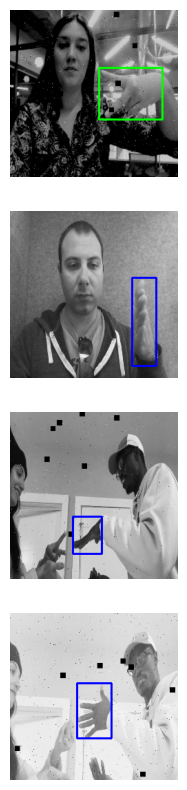

In [90]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, BATCH_SIZE//4, i + 1)
        label = labels[0][i]
        box = (labels[1][i] * input_size)
        box = tf.cast(box, tf.int32)

        image = images[i].numpy().astype("float") * 244.0
        image = image.astype(np.uint8)
        image_color = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

        if label[0] == 1:  # Class 1
            color = (0, 0, 255)  # Red
        elif label[1] == 1:  # Class 2
            color = (0, 255, 0)  # Green
        else:                 # Class 3
            color = (255, 0, 0)  # Blue


        cv.rectangle(image_color, box.numpy(), color, 2)

        plt.imshow(image_color)
        plt.axis("off")

# The Model
Our model needs to accomplish two tasks:
1. Regression of the bound box coordinates
2. Classification of the object label

Therefore the model has two outputs: namely the object label and the object bound box and the model must combine the tasks of classification and regression.



In [91]:
DROPOUT_FACTOR = 0.5

def build_feature_extractor(inputs):

    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(DROPOUT_FACTOR)(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    return x

def build_model_adaptor(inputs):
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    return x

def build_classifier_head(inputs):
    return tf.keras.layers.Dense(CLASSES, activation='softmax', name = 'classifier_head')(inputs)

def build_regressor_head(inputs):
    return tf.keras.layers.Dense(units = '4', name = 'regressor_head')(inputs)

def build_model(inputs):
    
    feature_extractor = build_feature_extractor(inputs)

    model_adaptor = build_model_adaptor(feature_extractor)

    classification_head = build_classifier_head(model_adaptor)

    regressor_head = build_regressor_head(model_adaptor)

    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss = {'classifier_head' : 'categorical_crossentropy', 'regressor_head' : 'mse' }, 
              metrics = {'classifier_head' : 'accuracy', 'regressor_head' : 'mse' })

    return model

In [92]:
model = build_model(tf.keras.layers.Input(shape=(input_size, input_size, 1,)))

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 244, 244, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 242, 242, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 average_pooling2d_6 (AveragePo  (None, 121, 121, 16  0          ['conv2d_6[0][0]']               
 oling2D)                       )                                                           

In [93]:
# from keras.utils.vis_utils import plot_model
# tf.keras.utils.plot_model(
# model, to_file='model.png', show_shapes=False, show_dtype=False,
# show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
# )
# plot_model(model, show_shapes=True, show_layer_names=True)

## Model Training 

In [94]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [96]:
EPOCHS = 50

history = model.fit(train_ds,
                    steps_per_epoch=(len(train_files) // BATCH_SIZE),
                    validation_data=validation_ds, validation_steps=1, 
                    epochs=EPOCHS)

Epoch 1/50


1671/1671 [==============================] - 20s 12ms/step - loss: 0.0716 - classifier_head_loss: 0.0530 - regressor_head_loss: 0.0186 - classifier_head_accuracy: 0.9829 - regressor_head_mse: 0.0186 - val_loss: 1.8931 - val_classifier_head_loss: 1.8636 - val_regressor_head_loss: 0.0295 - val_classifier_head_accuracy: 0.7159 - val_regressor_head_mse: 0.0295
Epoch 2/50
1671/1671 [==============================] - 20s 12ms/step - loss: 0.0657 - classifier_head_loss: 0.0477 - regressor_head_loss: 0.0180 - classifier_head_accuracy: 0.9852 - regressor_head_mse: 0.0180 - val_loss: 1.6338 - val_classifier_head_loss: 1.6127 - val_regressor_head_loss: 0.0212 - val_classifier_head_accuracy: 0.7386 - val_regressor_head_mse: 0.0212
Epoch 3/50
1671/1671 [==============================] - 20s 12ms/step - loss: 0.0549 - classifier_head_loss: 0.0372 - regressor_head_loss: 0.0177 - classifier_head_accuracy: 0.9888 - regressor_head_mse: 0.0177 - val_loss: 1.6471 - val_classifier_head_loss: 1.6254 - val_r

The training performance can be checked in the charts below.

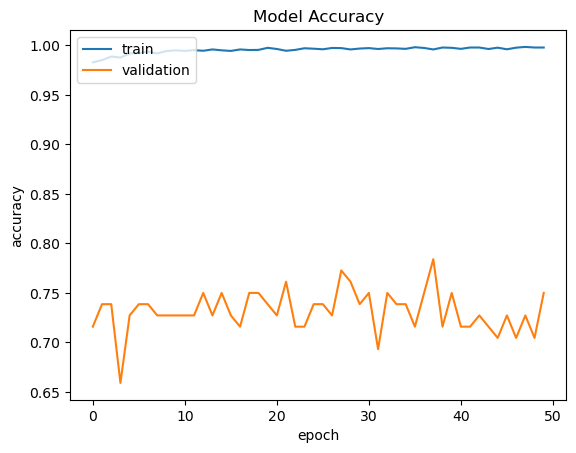

In [97]:
plt.plot(history.history['classifier_head_accuracy'])
plt.plot(history.history['val_classifier_head_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

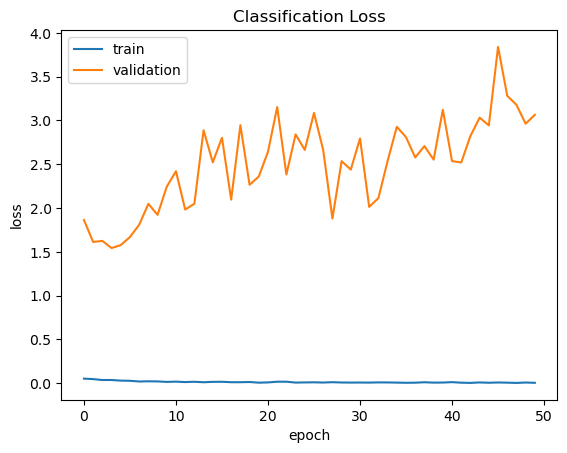

In [98]:
plt.plot(history.history['classifier_head_loss'])
plt.plot(history.history['val_classifier_head_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

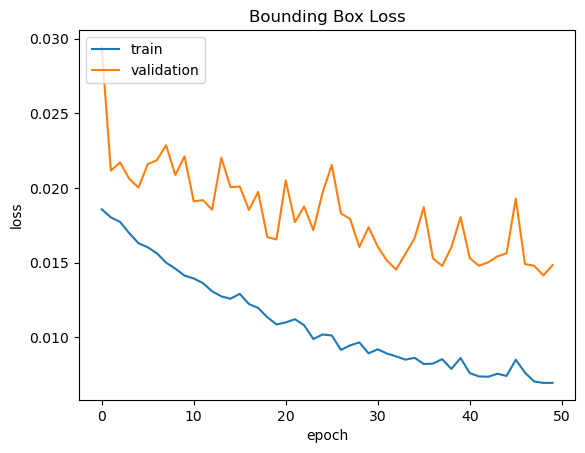

In [99]:
plt.plot(history.history['regressor_head_loss'])
plt.plot(history.history['val_regressor_head_loss'])
plt.title('Bounding Box Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluation
We'll evaluate the model using IoU- Intersection over Union - metrics. 

In [100]:
def intersection_over_union(boxA, boxB):
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
	yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	boxAArea = (boxA[2] + 1) * (boxA[3] + 1)
	boxBArea = (boxB[2] + 1) * (boxB[3] + 1)
	iou = interArea / float(boxAArea + boxBArea - interArea)
	return iou

In [101]:
def tune_test_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(1) 
    dataset = dataset.repeat()
    return dataset

test_ds = tune_test_ds(raw_test_ds)

The model performance is finally evaluated on the test dataset. Green boxes indicaates correct classification in which the predicted label (masked-unmasked) matches with the actual label. A red box indicate a wrong classification.

20


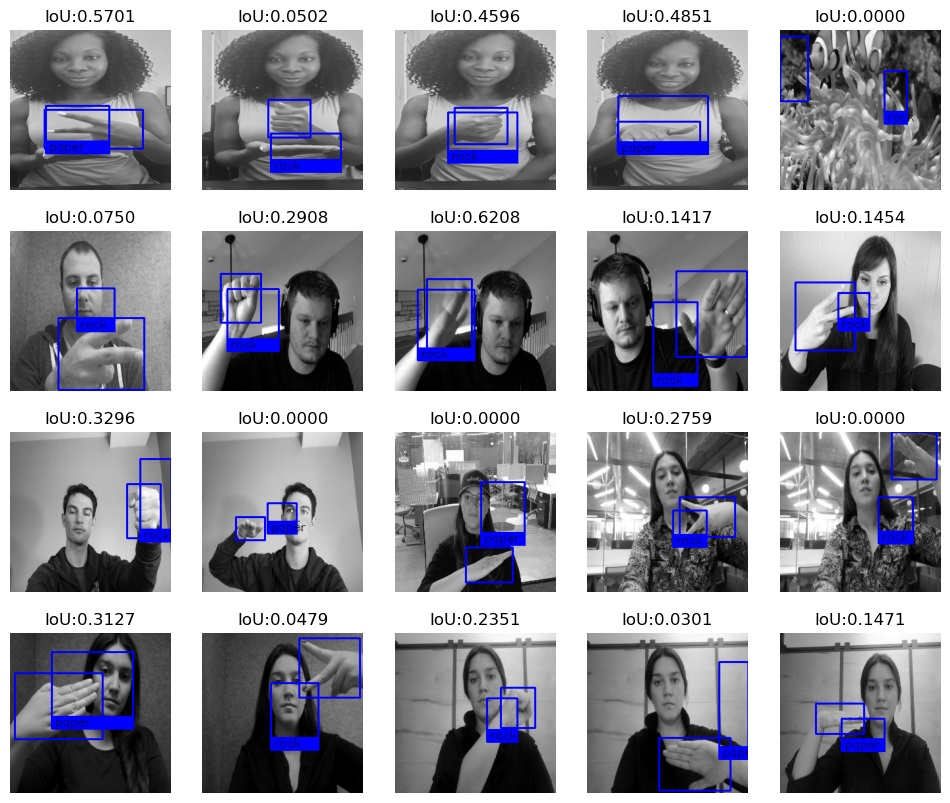

In [113]:
plt.figure(figsize=(12, 10))

test_list = list(test_ds.take(20).as_numpy_iterator())

print(len(test_list))

for i in range(len(test_list)):

    ax = plt.subplot(4, 5, i + 1)
    image, labels = test_list[i]

    predictions = model(image)

    predicted_box = predictions[1][0] * input_size
    predicted_box = tf.cast(predicted_box, tf.int32)

    predicted_label = predictions[0][0]

    image = image[0]

    actual_label = labels[0][0]
    actual_box = labels[1][0] * input_size
    actual_box = tf.cast(actual_box, tf.int32)

    image = image.astype("float") * 255.0
    image = image.astype(np.uint8)
    image_color = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

    # Find the class with the highest probability
    class_index = tf.argmax(predicted_label).numpy()
    
    class_labels = ["paper", "rock", "scissors"]
    img_label = class_labels[class_index]

    color = (0, 0, 255)

    predicted_box_n = predicted_box.numpy()
    cv.rectangle(image_color, predicted_box_n, color, 2)
    cv.rectangle(image_color, actual_box.numpy(), (0, 0, 255), 2)
    cv.rectangle(image_color, (predicted_box_n[0], predicted_box_n[1] + predicted_box_n[3] - 20), (predicted_box_n[0] + predicted_box_n[2], predicted_box_n[1] + predicted_box_n[3]), color, -1)
    cv.putText(image_color, img_label, (predicted_box_n[0] + 5, predicted_box_n[1] + predicted_box_n[3] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0))

    IoU = intersection_over_union(predicted_box.numpy(), actual_box.numpy())

    # Check if the prediction is wrong and set the box color to red
    if class_labels[class_index] != class_labels[int(actual_label[0])]:
        color = (255, 0, 0)

    plt.title("IoU:" + format(IoU, '.4f'))
    plt.imshow(image_color)
    plt.axis("off")



Let's now try to integrate the model to word with video input. 

In [109]:

# Initialize video capture (0 for webcam, or provide video file path)
cap = cv2.VideoCapture("C:/Users/Utkarsh Dutta/OneDrive/Pictures/Camera Roll/WIN_20230926_14_35_11_Pro.mp4")
frame_count = 0  # Counter for frame number

while True:
    ret, frame = cap.read()  # Read a frame from the video

    if not ret:
        break  # Break the loop if the video ends

    # Save the frame as an image
    frame_filename = f'C:/Khare/Postman_drive/Frames/frame_{frame_count:04d}.jpg'
    frame_dir = 'C:/Khare/Postman_drive/Frames/'
    cv2.imwrite(frame_filename, frame)

    # Increment the frame counter
    frame_count += 1

    frame_raw = data_load(frame_filename, frame_dir)
    frame_tuned = tune_validation_ds(frame_raw) 
    predictions = model(frame_tuned)


    # # Post-process predictions and draw bounding boxes and labels on the frame
    
    # frame_copy = frame.copy()  # Make a copy of the original frame

    # image, labels = test_list[i]
    # predictions = model(image)

    # predicted_box = predictions[1][0] * input_size
    # predicted_box = tf.cast(predicted_box, tf.int32)

    # predicted_label = predictions[0][0]

    # actual_label = labels[0][0]
    # actual_box = labels[1][0] * input_size
    # actual_box = tf.cast(actual_box, tf.int32)

    # frame_copy = frame_copy.astype("float") * 255.0
    # frame_copy = frame_copy.astype(np.uint8)
    # frame_color = cv2.cvtColor(frame_copy, cv2.COLOR_GRAY2RGB)

    # color = (0, 255, 0)  # Default color (green) for correct predictions

    # # Check if predicted label does not match the actual label (red for incorrect)
    # if (predicted_label.argmax() != actual_label.argmax()):
    #     color = (0, 0, 255)  # Red color for incorrect predictions

    # img_label = "Label: " + str(actual_label.argmax())  # Display actual label

    # # Draw bounding boxes and labels on the frame
    # cv2.rectangle(frame_color, predicted_box, color, 2)
    # cv2.rectangle(frame_color, actual_box, (0, 0, 255), 2)
    # cv2.rectangle(frame_color, (predicted_box[0], predicted_box[1] + predicted_box[3] - 20), (predicted_box[0] + predicted_box[2], predicted_box[1] + predicted_box[3]), color, -1)
    # cv2.putText(frame_color, img_label, (predicted_box[0] + 5, predicted_box[1] + predicted_box[3] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0))

    # IoU = intersection_over_union(predicted_box.numpy(), actual_box.numpy())

    # cv2.putText(frame_color, "IoU:" + format(IoU, '.4f'), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0))


    # # Display the processed frame
    # cv2.imshow('Object Detection', frame)

    # # Exit the loop when 'q' is pressed
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Khare/Postman_drive/Frames/C.txt'